# Building a Supervised Learning Model to Predict the Outcome of Credit Card Applications

## TL/DR:
<p>I used the <a href="http://archive.ics.uci.edu/ml/datasets/credit+approval">Credit Card Approval dataset</a> from the UCI Machine Learning Repository to produce a supervised machine learning model that predicts whether an credit card applicant will get approved or declined.
The steps taken were:
<li>1. Explore the dataset to understand what it contains and what needs to be cleaned.
<li>2. Some exploratory data analysis to build intuitions.</li>
<li>3-5. Split the dataset into train and test data, preprocessed the dataset and cleaned it up to ensure the machine learning model we choose can make good predictions.</li>
<li>6. Assess which model should perform best.
<li>7-8. Finally, built the machine learning model and optimized it so that it can predict if an individual's application for a credit card will be accepted and optimized it.</li>
</ul>

### Conclusion:
<p>The best supervised machine learning model was a <b> Logistic Regression </b> model. It was such a good model that it actually predicted results with 100% accuracy... Yes, a little too good to be true if looking at most data from the real world... but I found the prediction from our models could rely solely on the credit score and determine with 100% accuracy what the application outcome would be!
<p>Below displays the performance of my model - The Accuracy of 1.0, ROC score of 1.0 and curve displays this. Plus, the confusion matrix shows that 0 outcomes were predicted incorrectly in the train and test data (0's in the top right and bottom left).

Accuracy
Train: 1.0
Test: 1.0
ROC
Train: 1.0
Test: 1.0


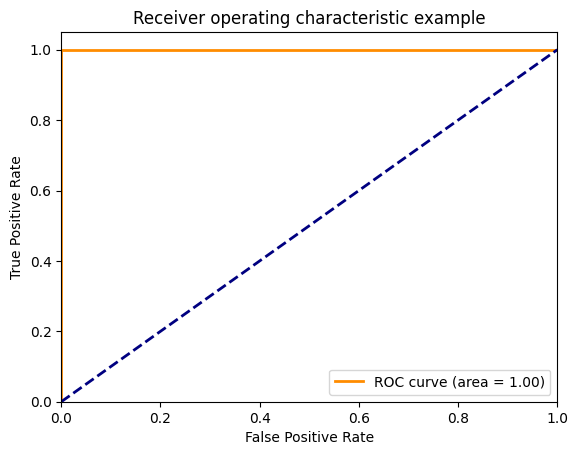

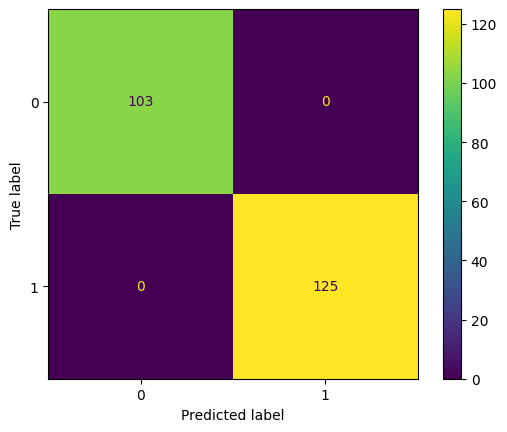

None

In [41]:
logreg = LogisticRegression(max_iter=100)
logreg.fit(rescaledX_train, y_train)
display(_get_model_performance(model_, rescaledX_train, rescaledX_test, y_train, y_test))

# Method and Code:
<p>The full steps taken and code to get to the above model are displayed below:

## 1. Import Required Packages and load the Data
<p>First, I will import required packages and load and view the dataset - since this data is confidential, the contributor of the dataset has anonymized the feature names.</p>
<p>The dataset has a mixture of numerical and non-numerical features, it contains values from different ranges, plus that it contains a number of missing entries.</li>

In [2]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plt
import shap
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
# Import pandas
import pandas as pd

# Load dataset
cc_apps = pd.read_csv("cc_approvals.data", header = None)

# Inspect data
cc_apps.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


## 2. Inspecting the applications
<p>Given the anonymized features, the columns don't mean a lot just looking at them, however I can try to figure out the most important features of a credit card application. From <a href="http://rstudio-pubs-static.s3.amazonaws.com/73039_9946de135c0a49daa7a0a9eda4a67a72.html">this blog</a> we can get a pretty good overview of the probable features. The probable features in a typical credit card application are <code>Gender</code>, <code>Age</code>, <code>Debt</code>, <code>Married</code>, <code>BankCustomer</code>, <code>EducationLevel</code>, <code>Ethnicity</code>, <code>YearsEmployed</code>, <code>PriorDefault</code>, <code>Employed</code>, <code>CreditScore</code>, <code>DriversLicense</code>, <code>Citizen</code>, <code>ZipCode</code>, <code>Income</code> and finally the <code>ApprovalStatus</code>.   </p>
<p>However, first we'll look more at the data to confirm whether it needs any more cleaning before being used for a supervised learning model.</p>

In [5]:
# Print summary statistics
cc_apps_description = cc_apps.describe()
print(cc_apps_description)

print('\n')

# Print DataFrame information
cc_apps_info = cc_apps.info()
print(cc_apps_info)

print('\n')

# Inspect missing values in the dataset
cc_apps.tail(17)

               2           7          10             14
count  690.000000  690.000000  690.00000     690.000000
mean     4.758725    2.223406    2.40000    1017.385507
std      4.978163    3.346513    4.86294    5210.102598
min      0.000000    0.000000    0.00000       0.000000
25%      1.000000    0.165000    0.00000       0.000000
50%      2.750000    1.000000    0.00000       5.000000
75%      7.207500    2.625000    3.00000     395.500000
max     28.000000   28.500000   67.00000  100000.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 no

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
673,?,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,00260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,00240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,00129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,00100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,-
680,b,19.50,0.290,u,g,k,v,0.290,f,f,0,f,g,00280,364,-
681,b,27.83,1.000,y,p,d,h,3.000,f,f,0,f,g,00176,537,-
682,b,17.08,3.290,u,g,i,v,0.335,f,f,0,t,g,00140,2,-


## 3. Splitting the dataset into train and test sets
<p>Now, we will split our data into train set and test set to prepare our data for two different phases of machine learning modeling: training and testing.

In [7]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Drop the features 11 and 13
cc_apps = cc_apps.drop(columns=[11, 13])

# Split into train and test sets
cc_apps_train, cc_apps_test = train_test_split(cc_apps, test_size=0.33, random_state=42)

## 4. Handling the missing values (part i)
<p>The issues identified and needing fixing when inspecting the DataFrame, include:</p>
<ul>
<li>The dataset contains both numeric and non-numeric data (specifically data that are of <code>float64</code>, <code>int64</code> and <code>object</code> types).</li>
<li>The dataset also contains values from several ranges. Some features have a value range of 0 - 28, some have a range of 2 - 67, etc. </li>
<li>Finally, the dataset has missing values which can be temporarily replaced with NaN. Then for numeric values I can impute the missing values with a strategy called mean imputation, for non-numeric are I can impute these missing values with the most frequent values as present in the respective columns.</p>

In [13]:
# Import numpy
import numpy as np

# Replace the '?'s with NaN in the train and test sets
cc_apps_train = cc_apps_train.replace('?', np.NaN)
cc_apps_test = cc_apps_test.replace('?', np.NaN)

# Impute the missing values with mean imputation
cc_apps_train.fillna(cc_apps_train.mean(), inplace=True)
cc_apps_test.fillna(cc_apps_train.mean(), inplace=True)

# Count the number of NaNs in the datasets and print the counts to verify
print(cc_apps_train.isnull().sum())
print(cc_apps_test.isnull().sum())

# Iterate over each column of cc_apps_train
for col in cc_apps_train.columns:
    # Check if the column is of object type
    if cc_apps_train[col].dtypes == 'object':
        # Impute with the most frequent value
        cc_apps_train = cc_apps_train.fillna(cc_apps_train[col].value_counts().index[0])
        cc_apps_test = cc_apps_test.fillna(cc_apps_test[col].value_counts().index[0])

# Count the number of NaNs in the dataset and print the counts to verify
print(cc_apps_train.isnull().sum())
print(cc_apps_test.isnull().sum())

0     8
1     5
2     0
3     6
4     6
5     7
6     7
7     0
8     0
9     0
10    0
12    0
14    0
15    0
dtype: int64
0     4
1     7
2     0
3     0
4     0
5     2
6     2
7     0
8     0
9     0
10    0
12    0
14    0
15    0
dtype: int64
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
12    0
14    0
15    0
dtype: int64
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
12    0
14    0
15    0
dtype: int64


Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


## 5. Preprocessing the Data
The steps here are:
<li>Convert the non-numeric data into numeric.</li>
<li>Scale the feature values to a uniform range. For example, the credit score of a person is their creditworthiness based on their credit history. The higher this number, the more financially trustworthy a person is considered to be. So, a <code>CreditScore</code> of 1 is the highest since we're rescaling all the values to the range of 0-1.</li>

In [19]:
# Convert the categorical features in the train and test sets independently
cc_apps_train = pd.get_dummies(cc_apps_train)
cc_apps_test = pd.get_dummies(cc_apps_test)

# Reindex the columns of the test set aligning with the train set
cc_apps_test = cc_apps_test.reindex(columns=cc_apps_train.columns, fill_value=0)

# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Segregate features and labels into separate variables
X_train, y_train = cc_apps_train.iloc[:, :-1].values, cc_apps_train.iloc[:, [-1]].values
X_test, y_test = cc_apps_test.iloc[:, :-1].values, cc_apps_test.iloc[:, [-1]].values

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)
y_train = y_train.ravel()

In [25]:
cc_apps_train.iloc[:, [-1]].groupby('15_-').size()

15_-
0    204
1    258
dtype: int64

## 6. Finding the best performing model

<p> Now the data is ready to fit to a model. Given this is a classification problem (i.e. credit card application = approved or denied) we know the best models will likely be Logistic Regression, K Nearest Neighbor or a Decision Tree Classifier...
    
<p> And the results below show the Logistic Regression and Decision Tree Classifier are both the best - in fact they are perfect at classifying based on the train and test data.

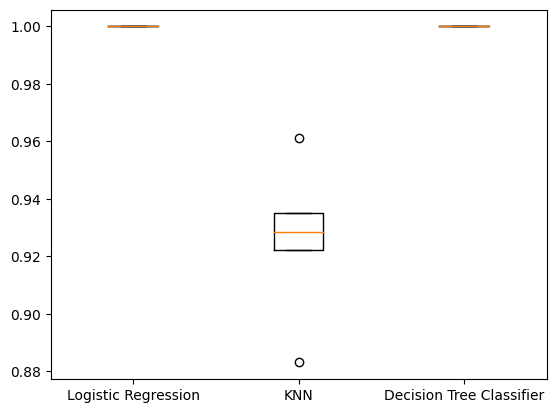

In [20]:
# Create models dictionary
models = {"Logistic Regression": LogisticRegression(max_iter=1000), "KNN": KNeighborsClassifier(), "Decision Tree Classifier": DecisionTreeClassifier()}
results = []

# Loop through the models' values
for model in models.values():
  
  # Instantiate a KFold object
  kf = KFold(n_splits=6, random_state=12, shuffle=True)
  
  # Perform cross-validation
  cv_results = cross_val_score(model, rescaledX_train, y_train, cv=kf)
  results.append(cv_results)
plt.boxplot(results, labels=models.keys())
plt.show()

<p> Lets do some deeper analysis by using an ROC Curve and Confusion Matrix Display to find the performance of these models.
<p> So what do they tell us? 
<li>Basically that the logistic regression and Decision Tree Classifier are 100% accurate! The ROC Curve shows that it scores a 1.0 and the Confusion Matrix Dsiplay shows that 0 of the predicted values were predicted wrong. 
<li>KNN was actually a prett good model on its own, having an ROC score of 0.93 and only misclassifying a small number based on the confusion matrix.

Logistic Regression
Accuracy
Train: 1.0
Test: 1.0
ROC
Train: 1.0
Test: 1.0


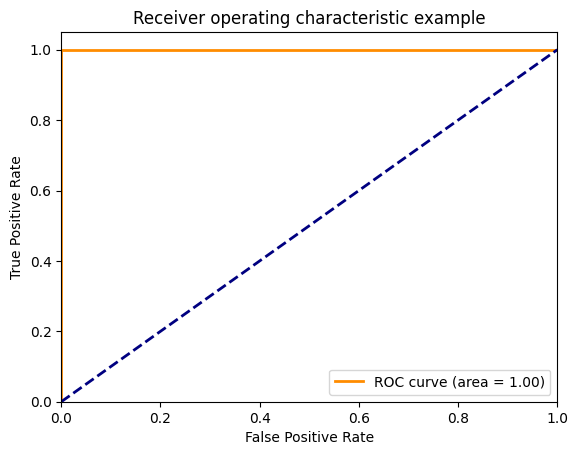

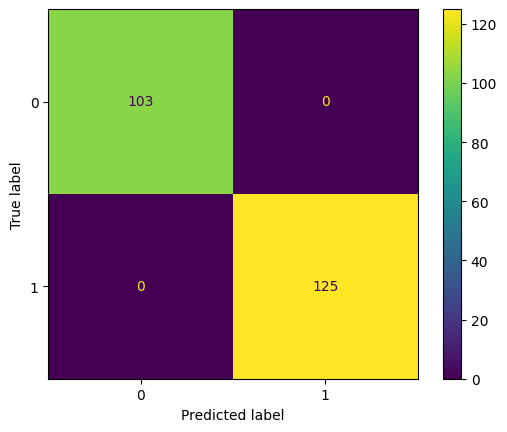

None

KNN
Accuracy
Train: 0.9458874458874459
Test: 0.9254385964912281
ROC
Train: 0.9464204286365708
Test: 0.9251650485436893


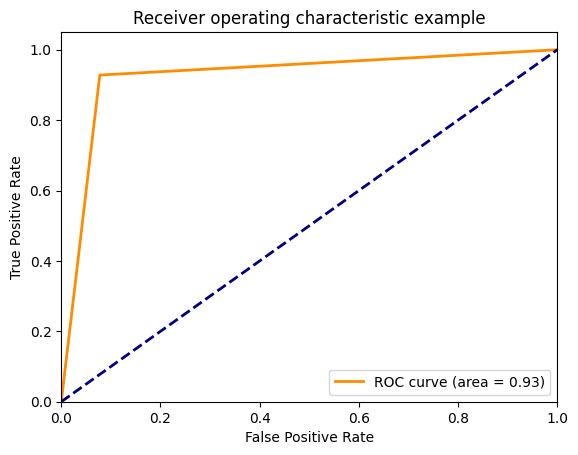

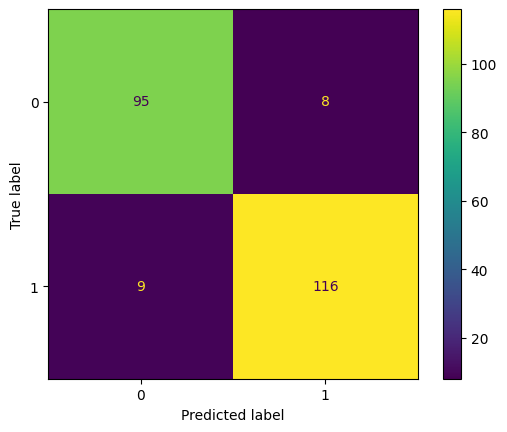

None

Decision Tree Classifier
Accuracy
Train: 1.0
Test: 1.0
ROC
Train: 1.0
Test: 1.0


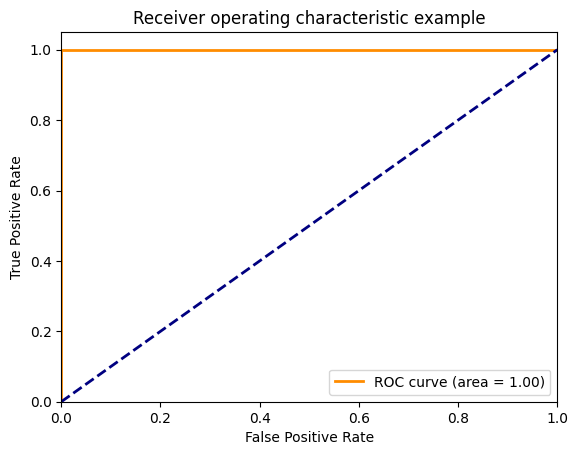

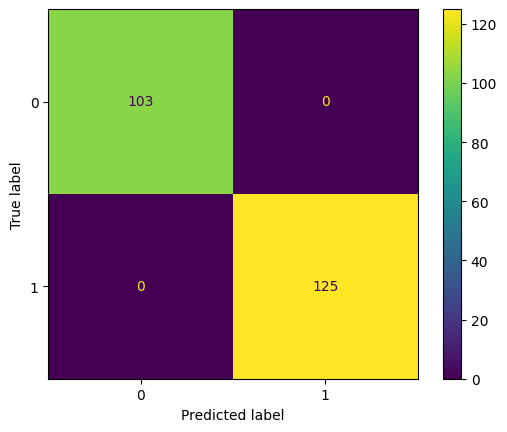

None

In [33]:
# Create models dictionary
models = {"Logistic Regression": LogisticRegression(max_iter=1000), "KNN": KNeighborsClassifier(), "Decision Tree Classifier": DecisionTreeClassifier()}
results = []

# Loop through the models' values and use the function highlighted below to get the output performance
for name in models:

  print(name)
  model_ = models[name]
  model_.fit(rescaledX_train, y_train)
  display(_get_model_performance(model_, rescaledX_train, rescaledX_test, y_train, y_test))

## 7. So why is it so accurate?
<p>To find that out lets first see what features have the largest influence on the overall model prediction of whether a credit card application is approved. We can do this by calculating Shap Values and graphing the top 3.
<p>So what does it tell us... Well, feature 332 has the largest (and only) influence on the overall prediction. What is feature 332? It is the credit score - essentially the credit score of an applicant is so integral to the application outcome in this dataset that the decision tree model and logistic regression model can classify the outcome perfectly based on this alone!

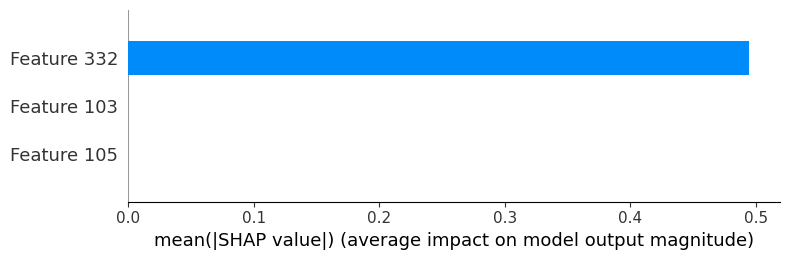

In [39]:
#it the Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(rescaledX_train, y_train)

# Determine Shap Values and graph top 3
shap_values = shap.TreeExplainer(dtc).shap_values(rescaledX_test)
shap.summary_plot(shap_values[1], rescaledX_test, plot_type="bar", max_display=3, show=False)
plt.savefig('bar.png', format = "png",dpi = 350,bbox_inches = 'tight')

## 8. Optimizing the model
<p>Ok, 100% accruracy means we don't need to optimize the model, but just for the sake of practice I will use grid search to "optimize" the model (which literally can't be optimized since it is perfect now).
<p>I can perform a grid search of the model parameters to improve the model's ability to predict credit card approvals.</p>
<p><a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html">scikit-learn's implementation of logistic regression</a> consists of different hyperparameters but we will grid search over the following two:</p>
<li>tol</li>
<li>max_iter</li>
</ul>
<p>after the cell I will store the best-achieved score and the respective best parameters for our Logistic Regression Model used to predict the outcome of a credit score application.</p>


In [36]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the grid of values for tol and max_iter
tol = [0.01, 0.001, 0.0001]
max_iter = [100,150,200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param_grid = dict(tol=tol, max_iter=max_iter)

#logreg model to optimize
logreg = LogisticRegression(max_iter=1000)
logreg.fit(rescaledX_train, y_train)

# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# Fit grid_model to the data
grid_model_result = grid_model.fit(rescaledX_train, y_train)

# Summarize results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

# Extract the best model and evaluate it on the test set
best_model = grid_model_result.best_estimator_
print("Accuracy of logistic regression classifier: ", best_model)

Best: 1.000000 using {'max_iter': 100, 'tol': 0.01}
Accuracy of logistic regression classifier:  LogisticRegression(tol=0.01)


In [29]:
#Function to get the performance of models as displayed above in part 6 with the graphs
def _get_model_performance(m, X_train, X_test, y_train, y_test):
    y_train_score = m.predict(X_train)
    y_test_score = m.predict(X_test)
    y_train_pred = y_train_score >= 0.5
    y_test_pred = y_test_score >= 0.5

    print("Accuracy")
    print("Train:" , accuracy_score(y_train, y_train_pred))
    print("Test:" , accuracy_score(y_test, y_test_pred))
    
    # Compute ROC curve and ROC area 
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_score)
    roc_auc_train = auc(fpr_train, tpr_train)

    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_score)
    roc_auc_test = auc(fpr_test, tpr_test)

    print("ROC")
    print("Train:", roc_auc_train)
    print("Test:", roc_auc_test)
    
    # plot curve
    plt.figure()
    lw = 2
    plt.plot(
        fpr_test,
        tpr_test,
        color="darkorange",
        lw=lw,
        label="ROC curve (area = %0.2f)" % roc_auc_test,
    )
    plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic example")
    plt.legend(loc="lower right")
    plt.show()
    
    cm = confusion_matrix(y_test, y_test_pred, labels=[0, 1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot()
    plt.show()
    